In [1]:
import squarify
import folderstats
import matplotlib.pyplot as plt


In [2]:
import sys
sys.path.insert(0, "..")

import microlog

microlog.start(
    application="Treemap",
    version=1.1,
    info="This uses Pandas",
    verbose=True,
    showInBrowser=True,
)

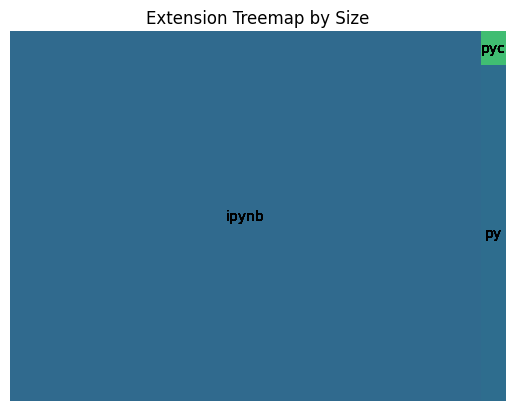

In [3]:

for n in range(10):
    df = folderstats.folderstats('./', ignore_hidden=True)


    # Group by extension and sum all sizes for each extension
    extension_sizes = df.groupby('extension')['size'].sum()
    # Sort elements by size
    extension_sizes = extension_sizes.sort_values(ascending=False)

    squarify.plot(sizes=extension_sizes.values, label=extension_sizes.index.values)
    plt.title('Extension Treemap by Size')
    plt.axis('off')

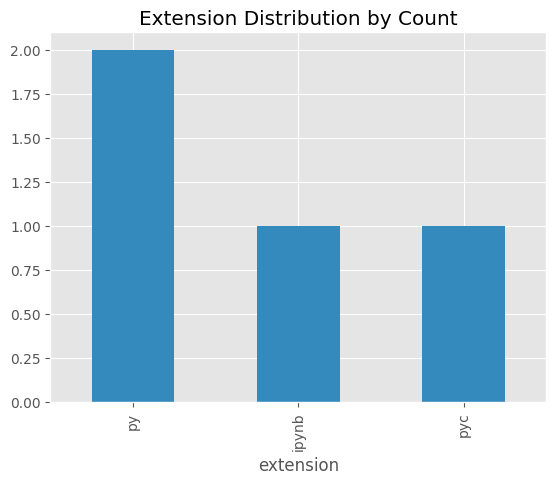

In [4]:
for n in range(10):
    with plt.style.context('ggplot'):
        df['extension'].value_counts().plot(
            kind='bar', color='C1', title='Extension Distribution by Count');

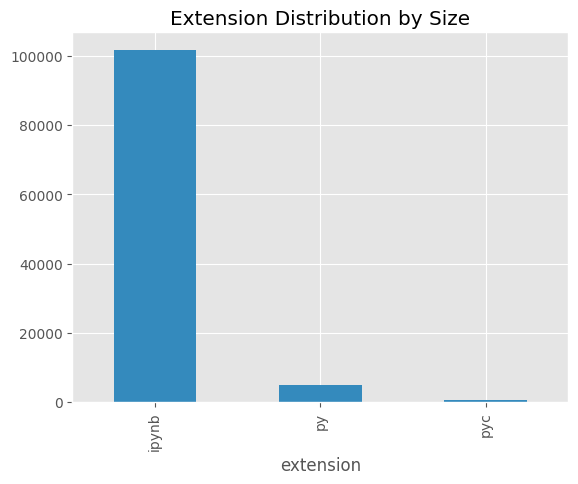

In [5]:
for n in range(10):
    with plt.style.context('ggplot'):
        # Group by extension and sum all sizes for each extension 
        extension_sizes = df.groupby('extension')['size'].sum()
        # Sort elements by size
        extension_sizes = extension_sizes.sort_values(ascending=False)
        
        extension_sizes.plot(
            kind='bar', color='C1', title='Extension Distribution by Size');

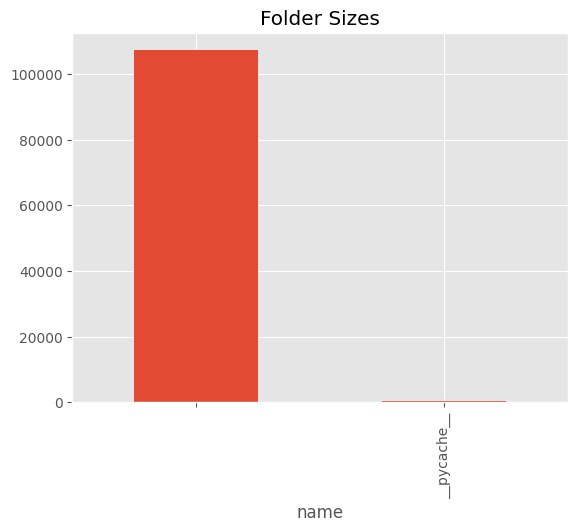

In [6]:
for n in range(10):
    with plt.style.context('ggplot'):
        # Filter the data set to only folders
        df_folders = df[df['folder']]
        # Set the name to be the index (so we can use it as a label later)
        df_folders.set_index('name', inplace=True)
        # Sort the folders by size
        df_folders = df_folders.sort_values(by='size', ascending=False)
        
        # Show the size of the largest 50 folders as a bar plot
        df_folders['size'][:50].plot(kind='bar', color='C0', title='Folder Sizes');

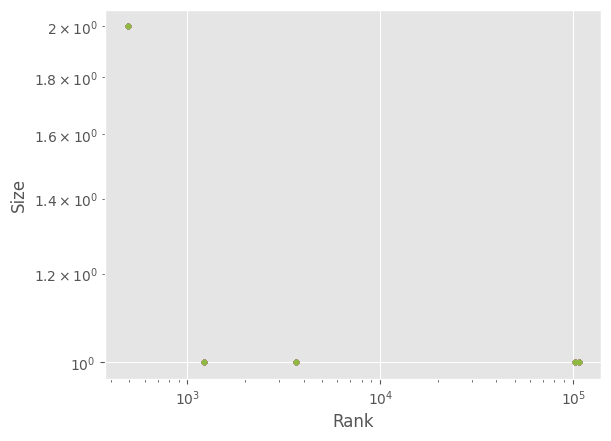

In [7]:
import numpy as np

for n in range(1000):
    with plt.style.context('ggplot'):
        y, bins = np.histogram(df['size'], bins=10000)
        plt.loglog(bins[:-1], y, '.');
        plt.ylabel('Size')
        plt.xlabel('Rank')

In [8]:
microlog.info("Importing networkx now")
import networkx as nx
microlog.info("Importing numpy now")
import numpy

microlog.debug("Creating graphs now")
for n in range(100):
    # Sort the index
    df_sorted = df.sort_values(by='id')

    G = nx.Graph()
    for i, row in df_sorted.iterrows():
        if row.parent:
            G.add_edge(row.id, row.parent)
microlog.error("Done. Not really an error, of course.")

In [9]:
import time

@microlog.trace
def allocate1GB():
    memory = []
    for n in range(1024):
        memory.append("x" * 1024 * 1024)
    return memory

@microlog.trace
def allocateLotsOfMemory():
    memory = []
    for n in range(5):
        memory.append(allocate1GB())
        time.sleep(0.2)

allocateLotsOfMemory()

In [10]:
microlog.stop()

--------------------------------------------------------------------------------
Microlog Statistics:
--------------------------------------------------------------------------------
-  number of events            6,683
-  file size                   159,802 bytes
-  compressed size             42,637 bytes
-  overhead for microlog       0.453s
   - Status                    0.562s
   - Tracer                    0.353s
   - FileCollector             0.124s
   - post-processing           0.037s
-  uncompressed output file    /Users/laffra/microlog/logs/Treemap-1.1-12-Apr-2023-16:56:26.log
-  browser URL                 http://127.0.0.1:4000/log/Treemap-1.1-12-Apr-2023-16:56:26.log.zip
-  wall time                   10.584s
-  total microlog overhead     4.63%
--------------------------------------------------------------------------------


[Errno 9] Bad file descriptor


: 